In [54]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderUnavailable
import time

In [55]:
def merge_csv_files(folder_path, output_file):
    csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

    merged_data = pd.DataFrame()

    for file in csv_files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        merged_data = pd.concat([merged_data, df], ignore_index=True)

    merged_data.to_csv(output_file, index=False)
    print(f"Merged data saved to {output_file}.")

In [56]:
if __name__ == "__main__":
    data_folder = "MagnaOpus_GitHub/cleaning/data"
    output_csv_file = "MagnaOpus_GitHub/cleaning/all_data_merged.csv"
    merge_csv_files(data_folder, output_csv_file)

Merged data saved to /Users/aryrubi/Desktop/Python_projects/MagnaOpus/training/all_data_merged.csv.


In [57]:
data_path = 'all_data_merged.csv'
data = pd.read_csv(data_path)

In [58]:
#Now we are going to check if these locations are actually in Tegucigalpa
unique_names = data['location'].unique().tolist()


In [6]:
# Initialize the geocoder
geolocator = Nominatim(user_agent="location_checker")

# List of location names and target city
location_names = unique_names
target_city = "Tegucigalpa"

# Initialize a list to store existing locations
existing_locations = []

for location_name in location_names:
    try:
        # Search for the location within the target city
        search_query = f"{location_name}, {target_city}"
        location_info = geolocator.geocode(search_query)

        if location_info:
            existing_locations.append(location_name)
        
        time.sleep(3)
    except GeocoderUnavailable as e:
        print("Geocoding service is unavailable:", e)

Geocoding service is unavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Valle+de+Angeles%2C+Tegucigalpa&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


In [59]:
data = data[data['location'].isin(existing_locations)]

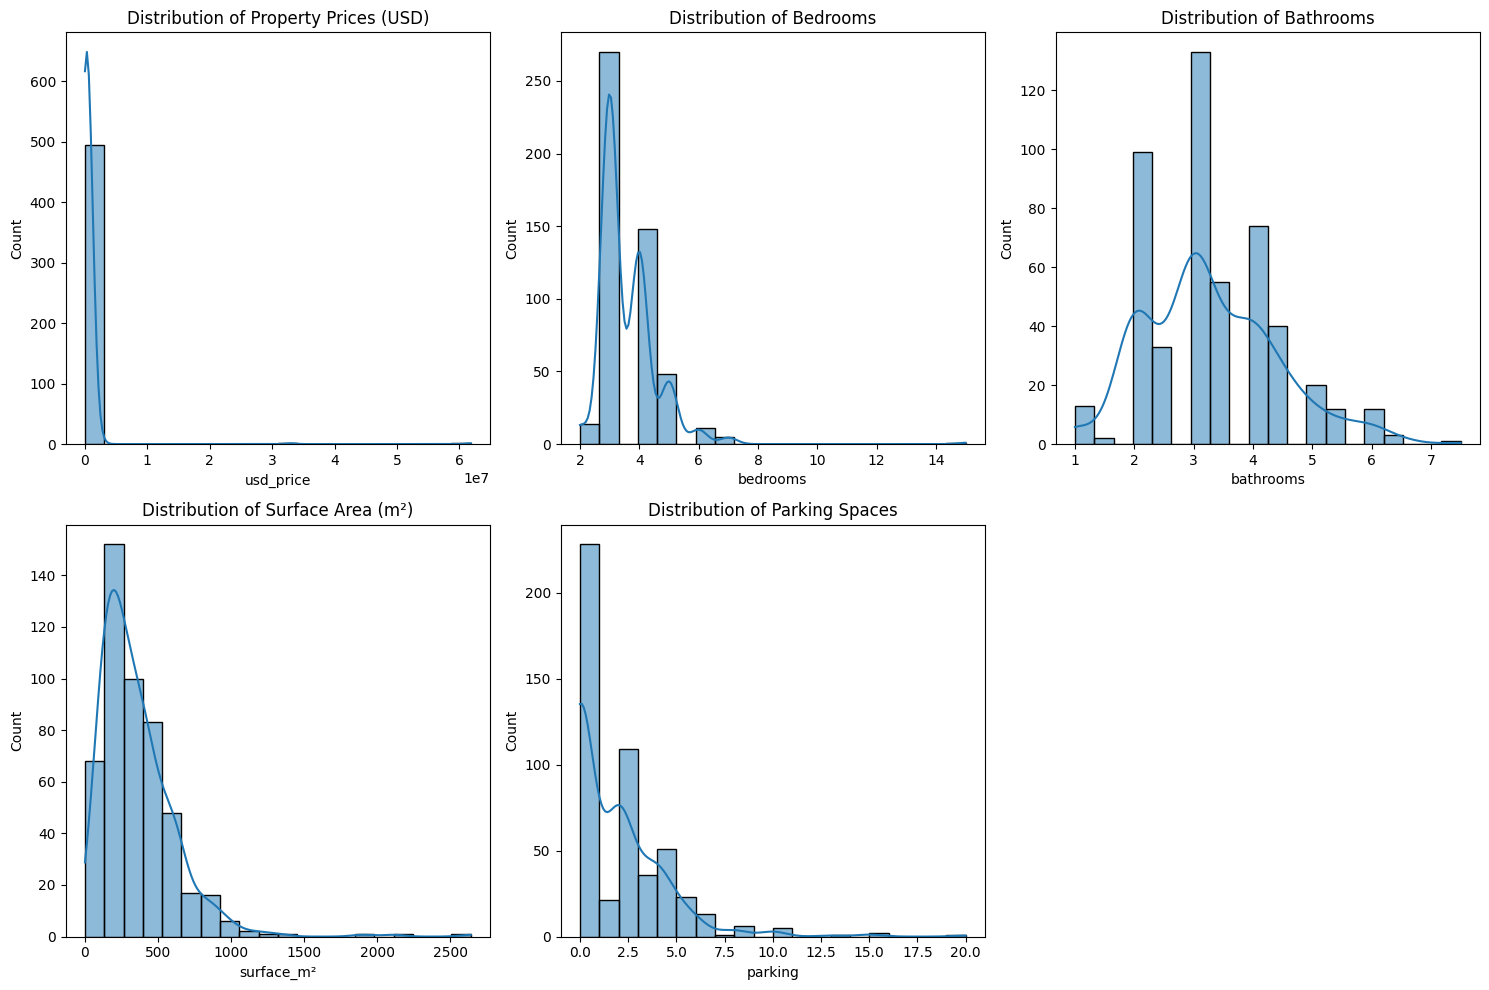

In [60]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(data['usd_price'], kde=True, bins=20)
plt.title('Distribution of Property Prices (USD)')

plt.subplot(2, 3, 2)
sns.histplot(data['bedrooms'], kde=True, bins=20)
plt.title('Distribution of Bedrooms')

plt.subplot(2, 3, 3)
sns.histplot(data['bathrooms'], kde=True, bins=20)
plt.title('Distribution of Bathrooms')

plt.subplot(2, 3, 4)
sns.histplot(data['surface_m²'], kde=True, bins=20)
plt.title('Distribution of Surface Area (m²)')

plt.subplot(2, 3, 5)
sns.histplot(data['parking'], kde=True, bins=20)
plt.title('Distribution of Parking Spaces')

plt.tight_layout()
plt.show()


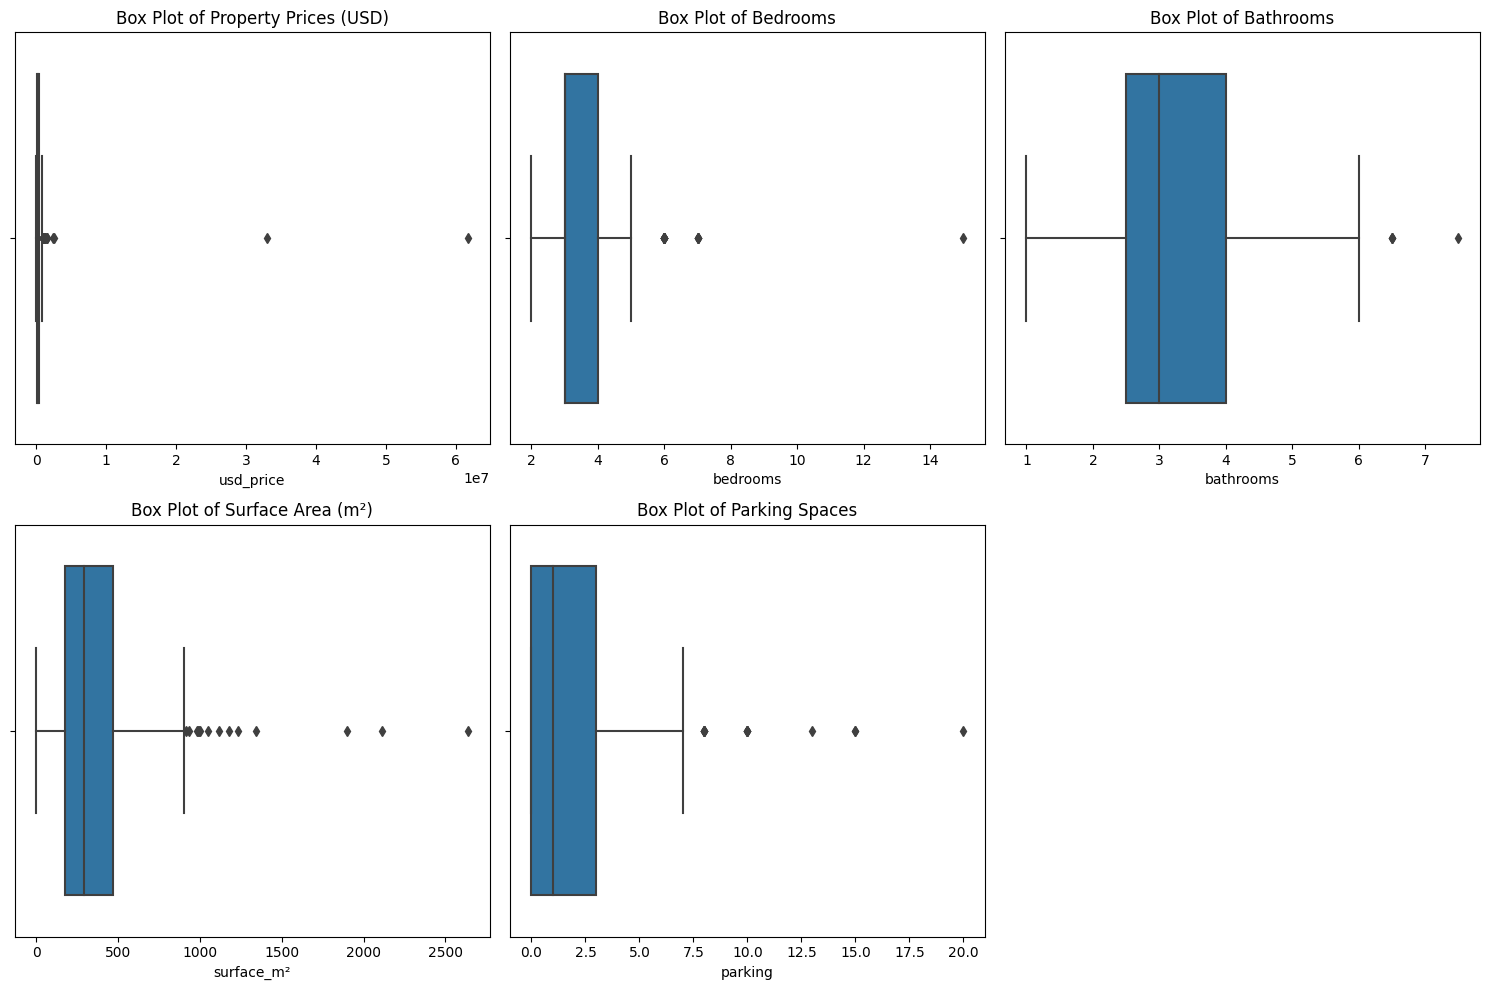

In [61]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(x=data['usd_price'])
plt.title('Box Plot of Property Prices (USD)')

plt.subplot(2, 3, 2)
sns.boxplot(x=data['bedrooms'])
plt.title('Box Plot of Bedrooms')

plt.subplot(2, 3, 3)
sns.boxplot(x=data['bathrooms'])
plt.title('Box Plot of Bathrooms')

plt.subplot(2, 3, 4)
sns.boxplot(x=data['surface_m²'])
plt.title('Box Plot of Surface Area (m²)')

plt.subplot(2, 3, 5)
sns.boxplot(x=data['parking'])
plt.title('Box Plot of Parking Spaces')

plt.tight_layout()
plt.show()


In [62]:
# Function to cap outliers at the 1st and 99th percentiles
def cap_outliers(series):
    lower = series.quantile(0.01)
    upper = series.quantile(0.99)
    return series.apply(lambda x: upper if x > upper else lower if x < lower else x)

# Capping outliers for the numerical variables
data['usd_price'] = cap_outliers(data['usd_price'])
data['bedrooms'] = cap_outliers(data['bedrooms'])
data['bathrooms'] = cap_outliers(data['bathrooms'])
data['surface_m²'] = cap_outliers(data['surface_m²'])
data['parking'] = cap_outliers(data['parking'])

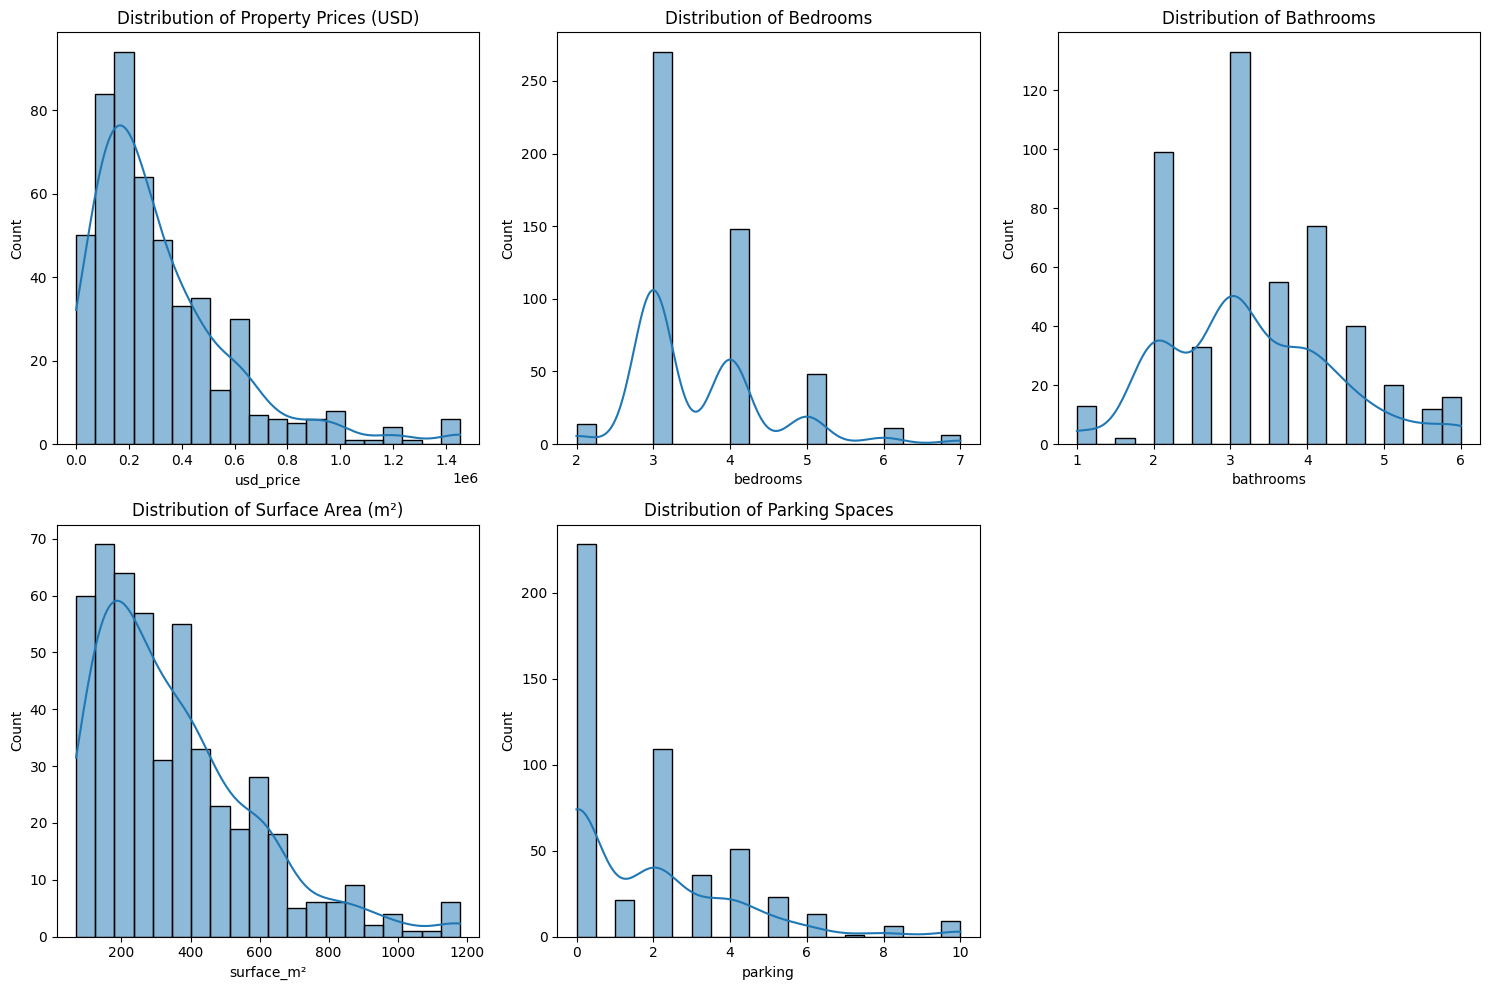

In [63]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(data['usd_price'], kde=True, bins=20)
plt.title('Distribution of Property Prices (USD)')

plt.subplot(2, 3, 2)
sns.histplot(data['bedrooms'], kde=True, bins=20)
plt.title('Distribution of Bedrooms')

plt.subplot(2, 3, 3)
sns.histplot(data['bathrooms'], kde=True, bins=20)
plt.title('Distribution of Bathrooms')

plt.subplot(2, 3, 4)
sns.histplot(data['surface_m²'], kde=True, bins=20)
plt.title('Distribution of Surface Area (m²)')

plt.subplot(2, 3, 5)
sns.histplot(data['parking'], kde=True, bins=20)
plt.title('Distribution of Parking Spaces')

plt.tight_layout()
plt.show()


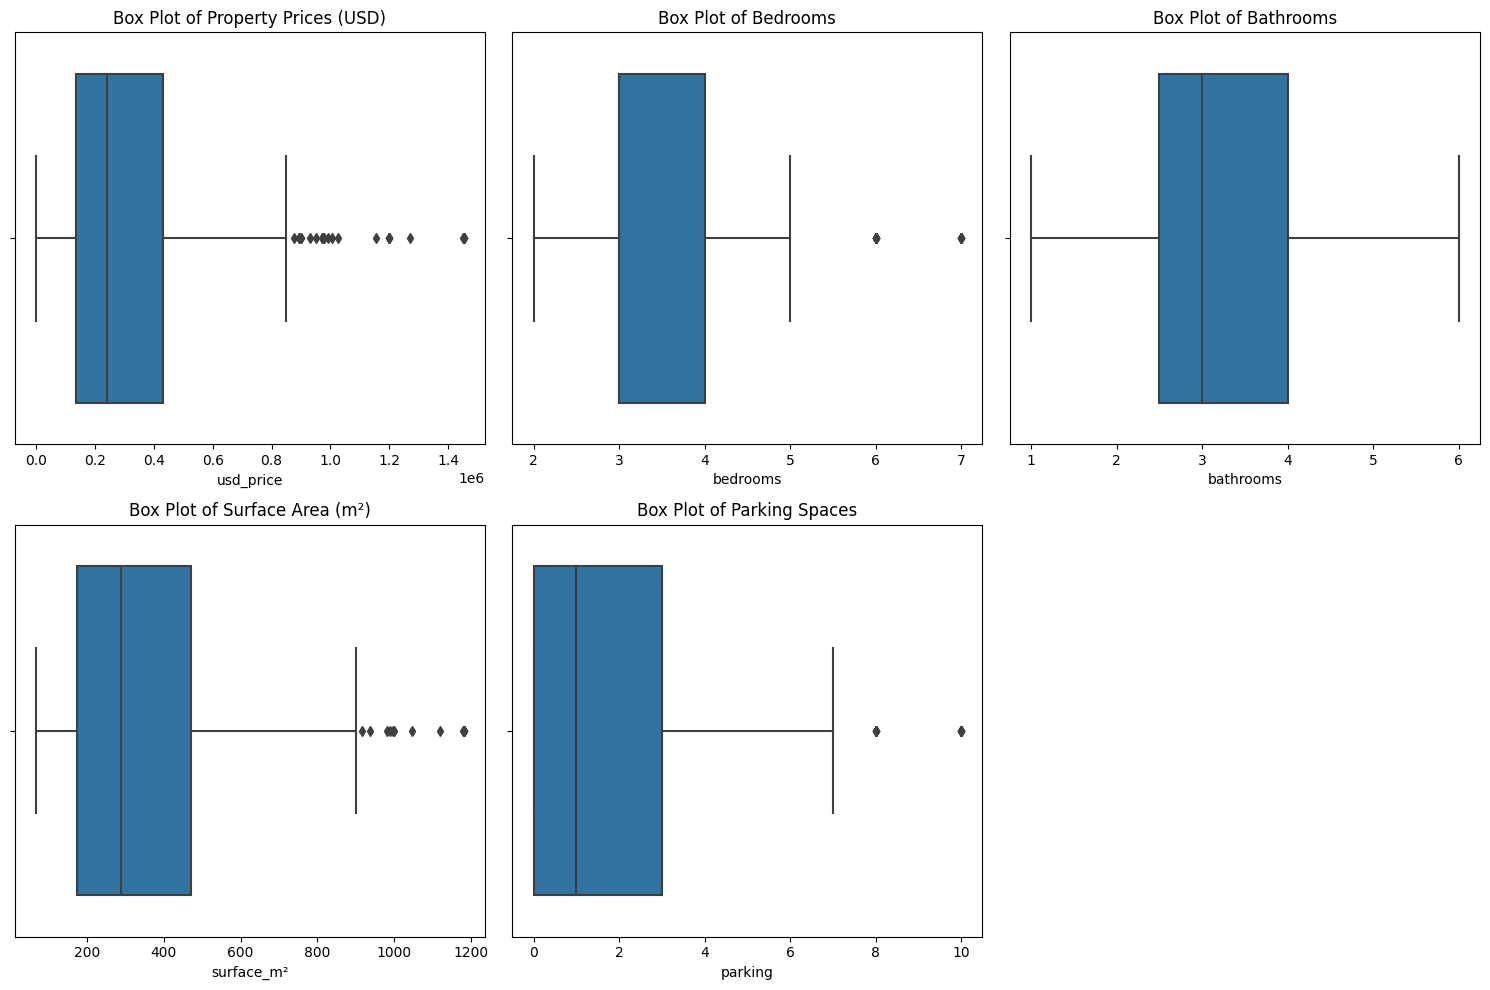

In [64]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(x=data['usd_price'])
plt.title('Box Plot of Property Prices (USD)')

plt.subplot(2, 3, 2)
sns.boxplot(x=data['bedrooms'])
plt.title('Box Plot of Bedrooms')

plt.subplot(2, 3, 3)
sns.boxplot(x=data['bathrooms'])
plt.title('Box Plot of Bathrooms')

plt.subplot(2, 3, 4)
sns.boxplot(x=data['surface_m²'])
plt.title('Box Plot of Surface Area (m²)')

plt.subplot(2, 3, 5)
sns.boxplot(x=data['parking'])
plt.title('Box Plot of Parking Spaces')

plt.tight_layout()
plt.show()


In [82]:
to_eliminate = [
    'Tegucigalpa', 'El Hato o San Ignacio', 'Danlí', 'Distrito Central', 'Francisco Morazan']

data = data[data['location'].apply(lambda x: x.strip() not in to_eliminate)]

In [83]:
def remove_words(s, words_to_remove):
    for word in words_to_remove:
        if s.startswith(word):
            s = s[len(word):].lstrip()
    return s

words_to_remove = ['Barrio', 'Colonia', 'Residencial']
data['location'] = data['location'].apply(lambda x: remove_words(x, words_to_remove))


In [84]:
name_mapping = {
    'Anillo Periferico': 'Anillo Periférico',
    'El Anillo Periferico': 'Anillo Periférico',
    'Las Lomas del Guijarro': 'Lomas del Guijarro',
    'Santa Lucia': 'Santa Lucía',
    'Villas de Real': 'Villas del Real',
    'Centro América Este': "Centroamérica",
    'Centro América Oeste': 'Centroamérica',
    'Centroamérica 1 y 2': 'Centroamérica',
    'América': 'Centroamérica',
    'Ruben Dario': 'Rubén Darío',
    'Villas Palmeras': 'Villas Las Palmeras'
}


data['location'] = data['location'].replace(name_mapping)

data = data.drop_duplicates()


In [85]:
data.to_csv('real_estate_tegucigalpa.csv')